# Course: Deep Learning
# Author: Sandro Camargo <sandrocamargo@unipampa.edu.br>
# Single Neuron Logistic Regression Example
# Dataset: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

A Python library is a collection of related functions. A library contains bundles of encapsuated code which can be used repeatedly in different programs.

In [1]:
# Import Libraries
import keras # Neural Network Library
from keras import layers # Layers to a neural network
from keras import optimizers # optimizers
import pandas as pd # Data Manipulation library
import numpy as np # Fast Numeric Computing library
import tensorflow as tf # Optimizers
import matplotlib.pyplot as plt # Plot library

In [2]:
# Loading dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv', header=1, skiprows=[124,125,126,170])
# About the parameters
# Header=1: column names (day, month, year, ...) are in the line 1 of this CSV file
# skiprows=[124,125,126,170]: this lines, which not contains valid data, are not imported

# inspecting columns and data types from "data" dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.7+ KB


The dataset must be randomly splitted in two parts: training set and testing set. The main approaches to split are holdout and n-fold cross validation.
*   Training set is used for building (training) the model. 
*   Testing set is used for testing the generalization ability of the model built.

Moreover, inputs($x$) and outputs($y$) must be splitted in each set. 




In [3]:
np.random.seed(1) # Random numbers will be ever the same
rnd = np.random.rand(len(data)) < 0.8 # Training set will contain 80% of the data

# Creating the training dataset (80%)
train_x = data[rnd] 
train_x.drop(train_x.columns[[13]], axis=1, inplace=True) # column 12 is removed, because it is the output (y)
train_y = data[rnd] 
train_y.drop(train_y.iloc[:, 0:13], axis=1, inplace=True) # columns from 1 to 11 are removed, because they are the inputs (x)

# Creating the testing dataset (80%)
test_x = data[~rnd] 
test_x.drop(test_x.columns[[13]], axis=1, inplace=True) 
test_y = data[~rnd] 
test_y.drop(test_y.iloc[:, 0:13], axis=1, inplace=True)

# Verifying dataset dimensions
print('The training dataset (inputs) dimensions are: ', train_x.shape)
print('The training dataset (outputs) dimensions are: ', train_y.shape)
print('The testing dataset (inputs) dimensions are: ', test_x.shape)
print('The testing dataset (outputs) dimensions are: ', test_y.shape)

The training dataset (inputs) dimensions are:  (188, 13)
The training dataset (outputs) dimensions are:  (188, 1)
The testing dataset (inputs) dimensions are:  (55, 13)
The testing dataset (outputs) dimensions are:  (55, 1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [4]:
print(train_y.value_counts())
train_y['Classes  ']=train_y['Classes  '].str.strip()
train_y.describe()
test_y['Classes  ']=test_y['Classes  '].str.strip()

Classes     
fire            99
not fire        82
fire             2
fire             2
not fire         1
not fire         1
not fire         1
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


The output is the column Classes. Its content is 'fire' or 'not fire'. But neural networks just deal with numbers. So, classes must be transformed in a binary column containing 0 for 'not fire' and 1 for 'fire'.

In [5]:
clas = {'fire': 1,'not fire': 0}
train_y_bin = train_y 
train_y_bin['Classes  '] = [clas[item] for item in train_y['Classes  ']]
test_y_bin = test_y 
test_y_bin['Classes  '] = [clas[item] for item in test_y['Classes  ']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


After creating the datasets, the next step is defining the architecture of our model.

It must be defined:


*   Architecture: in terms of neurons and layers
*   Optimizer: is the algorithm or method used to change the weights in order to minimize the loss function.

The last step is compiling the model. In this step the loss function, the optimizer and the evaluation metrics must be defined.

In [6]:
# Function to define model architecture
def build_model():
  # Defining the architecture
  # Sequential = Feedforward Neural Network
  # 1 single neuron
  # input_shape is the amount of columns from training set
  # activation function must be sigmoid, because this is a classification problem
  model = keras.Sequential([
        layers.Dense(1, input_shape = [len(train_x.columns)], activation = 'sigmoid')
  ])

  # Defining the optimizer
  optimizer = tf.keras.optimizers.RMSprop(
      learning_rate = 0.001)
  
  # Binary Cross Entropy is the default loss function in classification models
  model.compile(loss = 'binary_crossentropy',
      optimizer = optimizer,
      metrics = ['binary_crossentropy','binary_accuracy'])
  
  return model

Just for curiosity, you should observe how many parameters ($\theta$) your model has.
At this point, your model is built.

In [7]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


After creating the model, it must be trained (fitted).
Training is done using training set and the amount of epochs must be defined.

In [8]:
EPOCHS = 2000

history = model.fit(
    train_x, train_y_bin, epochs = EPOCHS, verbose = 1
)

Epoch 1/2000
6/6 [==============================] - 1s 3ms/step - loss: 719.9532 - binary_crossentropy: 719.9532 - binary_accuracy: 0.4521
Epoch 2/2000
6/6 [==============================] - 0s 3ms/step - loss: 707.8170 - binary_crossentropy: 707.8170 - binary_accuracy: 0.4521
Epoch 3/2000
6/6 [==============================] - 0s 3ms/step - loss: 698.7674 - binary_crossentropy: 698.7674 - binary_accuracy: 0.4521
Epoch 4/2000
6/6 [==============================] - 0s 3ms/step - loss: 690.5845 - binary_crossentropy: 690.5845 - binary_accuracy: 0.4521
Epoch 5/2000
6/6 [==============================] - 0s 3ms/step - loss: 682.5665 - binary_crossentropy: 682.5665 - binary_accuracy: 0.4521
Epoch 6/2000
6/6 [==============================] - 0s 4ms/step - loss: 674.7125 - binary_crossentropy: 674.7125 - binary_accuracy: 0.4521
Epoch 7/2000
6/6 [==============================] - 0s 3ms/step - loss: 666.9313 - binary_crossentropy: 666.9313 - binary_accuracy: 0.4521
Epoch 8/2000
6/6 [=========

This plot should be generated just to inspect the learning convergence. 
It is expected a decreasing of the loss function value through the epochs.


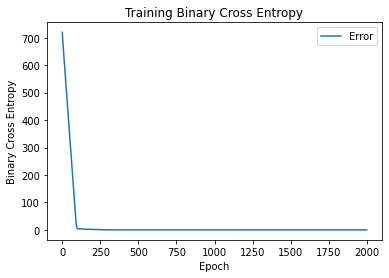

In [9]:
plt.plot(history.history['binary_crossentropy'])
plt.title('Training Binary Cross Entropy')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['Error'], loc='upper right')
plt.show()

After the training process, the knowledge learnt by a neural network is stored in its weights.

[[-0.03240903]
 [ 0.38637936]
 [-0.02766059]
 [ 0.12313272]
 [-0.0292991 ]
 [ 0.13602185]
 [-0.3666076 ]
 [ 0.5108235 ]
 [-0.1786825 ]
 [ 0.00247185]
 [ 1.6737438 ]
 [-0.05219151]
 [ 1.7547785 ]]


Text(0.5, 0, 'Inputs')

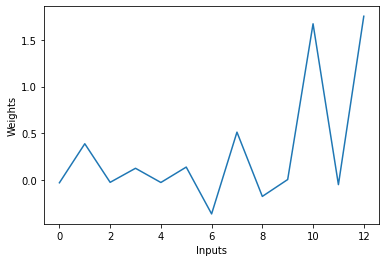

In [10]:
weights, biases = model.get_weights() # return a numpy list of weights
print(weights)
plt.plot(weights)
plt.ylabel('Weights')
plt.xlabel('Inputs')

In [11]:
test_predictions = model.predict(test_x).flatten() # predict radon activities with the built linear regression model
test_predictions1 = test_predictions > 0.5 #np.around(test_predictions)  # > 0.5
tp = np.count_nonzero((test_predictions1 == 1) & (np.transpose(test_y_bin) == 1))
tn = np.count_nonzero((test_predictions1 == 0) & (np.transpose(test_y_bin) == 0))
accuracy_test = (tp + tn)/len(test_y)
print('The accuracy on the test set is equal to: %.4f %%' % (accuracy_test*100))

2/2 [==============================] - 0s 7ms/step
The accuracy on the test set is equal to: 96.3636 %


In [12]:
train_predictions = model.predict(train_x).flatten() # predict radon activities with the built linear regression model
train_predictions1 = train_predictions > 0.5
tp = np.count_nonzero((train_predictions1 == 1) & (np.transpose(train_y_bin) == 1))
tn = np.count_nonzero((train_predictions1 == 0) & (np.transpose(train_y_bin) == 0))
accuracy_train = (tp + tn)/len(train_y)
print('The accuracy on the training set is equal to: %.4f %%.' % (accuracy_train*100))

6/6 [==============================] - 0s 3ms/step
The accuracy on the training set is equal to: 98.4043 %.


After the training process, the model should be tested in order to measure its quality, it means, how good are its predictions. The model must be evaluated using the testing set, which is composed by samples that are not in the training set. In classification problems, the accuracy is the default metric.
The accuracy is computed using real outputs ($y$) and predicted outputs ($\hat{y}$). Accuracy can vary between 0 (bad predictions) and 1 (perfect predictions). Accuracy also can be presented in percentage, ranging from 0 to 100%.